In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sensor-nodes.csv")
df.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-23 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-23 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-23 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-23 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-23 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [3]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train.shape)

Shape of X_train: (7000, 17)


In [6]:
sequence_length = X_train.shape[1]
num_features = 1

X_train_reshaped = X_train.reshape(-1, sequence_length, num_features)
X_val_reshaped = X_val.reshape(-1, sequence_length, num_features)
X_test_reshaped = X_test.reshape(-1, sequence_length, num_features)

In [7]:
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, num_features)))

model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

# model.add(Dense(1, activation='sigmoid'))

In [8]:
adam_optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

adam_history = model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.5792 - accuracy: 0.2011 - val_loss: 0.2976 - val_accuracy: 0.5807
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7896 - val_loss: 0.2806 - val_accuracy: 0.9000
Epoch 3/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.8534 - val_loss: 0.2697 - val_accuracy: 0.8927
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.9119 - val_loss: 0.2660 - val_accuracy: 0.9387
Epoch 5/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5327 - accuracy: 0.9297 - val_loss: 0.2638 - val_accuracy: 0.9420
Epoch 6/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.9360 - val_loss: 0.2633 - val_accuracy: 0.9487
Epoch 7/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5340 - accuracy: 0.9407 - val_loss: 0.2630 - val_accuracy: 0.9480
Epoch 

In [9]:
nadam_optimizer = Nadam(learning_rate=0.001)

model.compile(optimizer=nadam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

nadam_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
219/219 [==============================] - 1s 3ms/step - loss: 0.5295 - accuracy: 0.9467 - val_loss: 0.2551 - val_accuracy: 0.9540
Epoch 2/10
219/219 [==============================] - 1s 2ms/step - loss: 0.5297 - accuracy: 0.9316 - val_loss: 0.2345 - val_accuracy: 0.8200
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.9267 - val_loss: 0.2128 - val_accuracy: 0.9473
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.9409 - val_loss: 0.1947 - val_accuracy: 0.9453
Epoch 5/10
219/219 [==============================] - 1s 2ms/step - loss: 0.4880 - accuracy: 0.9390 - val_loss: 0.1760 - val_accuracy: 0.9453
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.9469 - val_loss: 0.1760 - val_accuracy: 0.9540
Epoch 7/10
219/219 [==============================] - 1s 2ms/step - loss: 0.4873 - accuracy: 0.9484 - val_loss: 0.1757 - val_accuracy: 0.9540
Epoch 

In [10]:
adagrad_optimizer = Adagrad(learning_rate=0.001)

model.compile(optimizer=adagrad_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

adagrad_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
219/219 [==============================] - 1s 3ms/step - loss: 0.4887 - accuracy: 0.9497 - val_loss: 0.1756 - val_accuracy: 0.9540
Epoch 2/10
219/219 [==============================] - 1s 2ms/step - loss: 0.4888 - accuracy: 0.9496 - val_loss: 0.1756 - val_accuracy: 0.9540
Epoch 3/10
219/219 [==============================] - 1s 2ms/step - loss: 0.4855 - accuracy: 0.9497 - val_loss: 0.1756 - val_accuracy: 0.9540
Epoch 4/10
219/219 [==============================] - 1s 2ms/step - loss: 0.4911 - accuracy: 0.9497 - val_loss: 0.1756 - val_accuracy: 0.9540
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.9497 - val_loss: 0.1756 - val_accuracy: 0.9540
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.9494 - val_loss: 0.1756 - val_accuracy: 0.9540
Epoch 7/10
219/219 [==============================] - 1s 2ms/step - loss: 0.4894 - accuracy: 0.9499 - val_loss: 0.1756 - val_accuracy: 0.9540
Epoch 

In [11]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

47/47 [==============================] - 0s 1ms/step - loss: 0.1862 - accuracy: 0.9527
Test Loss: 0.18621866405010223
Test Accuracy: 0.9526666402816772


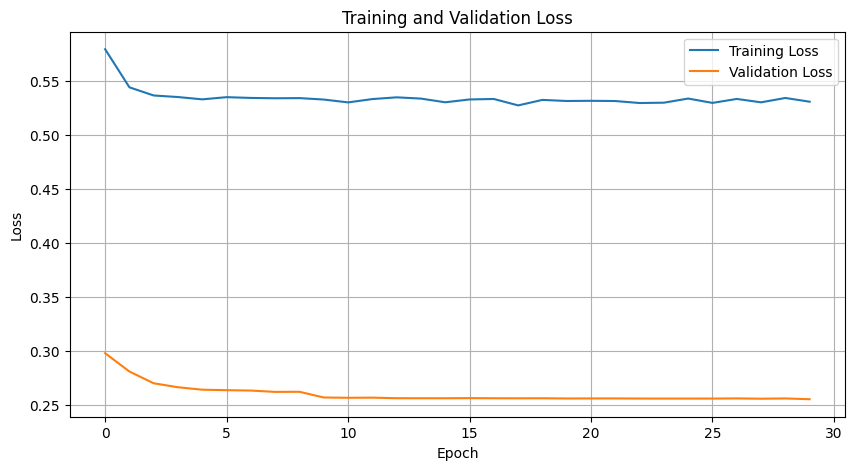

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['loss'], label='Training Loss')
plt.plot(adam_history.history['val_loss'], label='Validation Loss')

# plt.bar(np.arange(len(adam_history.history['loss'])), adam_history.history['loss'], label="Training Loss", color="blue", alpha=0.7)
# plt.bar(np.arange(len(adam_history.history['val_loss'])), adam_history.history['val_loss'], label="Validation Loss", color="lightblue", alpha=0.7)

plt.title("Training and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

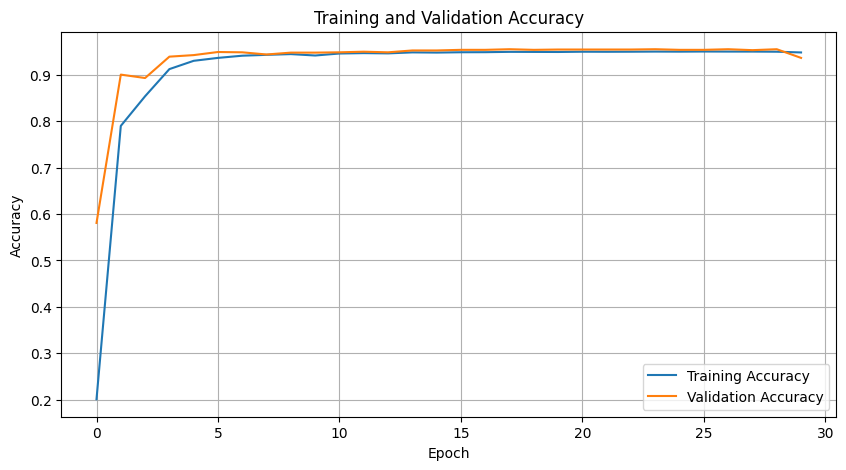

In [13]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['accuracy'], label='Training Accuracy')
plt.plot(adam_history.history['val_accuracy'], label='Validation Accuracy')

# plt.bar(np.arange(len(nadam_history.history['loss'])) + 0.2, nadam_history.history['loss'], label="Nadam Training Loss", color="red", alpha=0.7)
# plt.bar(np.arange(len(nadam_history.history['val_loss'])) + 0.2, nadam_history.history['val_loss'], label="Nadam Validation Loss", color="lightcoral", alpha=0.7)

plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

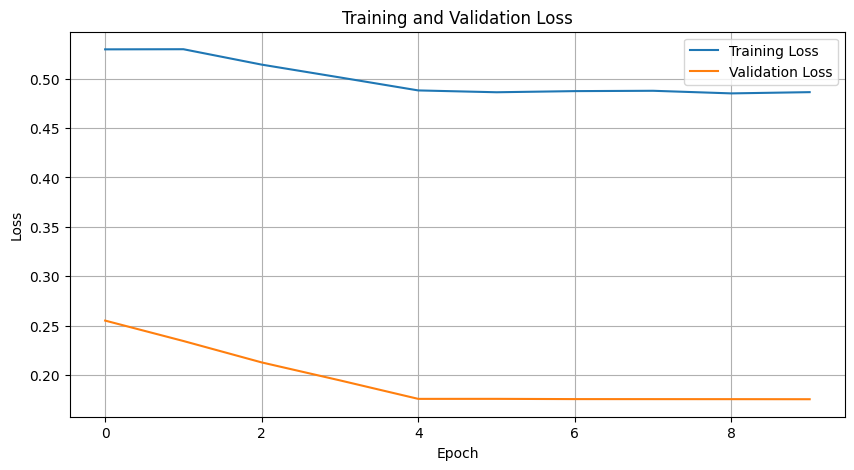

In [14]:
plt.figure(figsize=(10, 5))

plt.plot(nadam_history.history['loss'], label='Training Loss')
plt.plot(nadam_history.history['val_loss'], label='Validation Loss')

# plt.bar(np.arange(len(adagrad_history.history['loss'])) + 0.4, adagrad_history.history['loss'], label="Adagrad Training Loss", color="green", alpha=0.7)
# plt.bar(np.arange(len(adagrad_history.history['val_loss'])) + 0.4, adagrad_history.history['val_loss'], label="Adagrad Validation Loss", color="lightgreen", alpha=0.7)

plt.title("Training and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

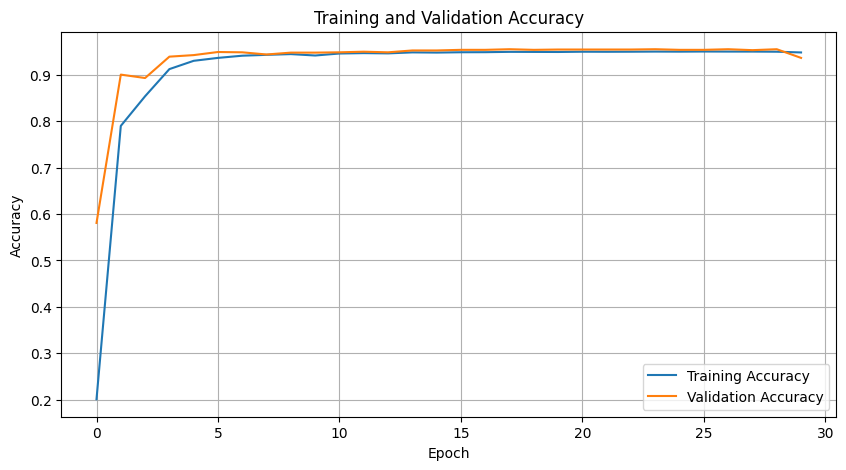

In [15]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['accuracy'], label='Training Accuracy')
plt.plot(adam_history.history['val_accuracy'], label='Validation Accuracy')

# plt.bar(np.arange(len(adam_history.history['accuracy'])), adam_history.history['accuracy'], label="Training Accuracy", color="blue", alpha=0.7)
# plt.bar(np.arange(len(adam_history.history['val_accuracy'])), adam_history.history['val_accuracy'], label="Validation Accuracy", color="lightblue", alpha=0.7)

plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

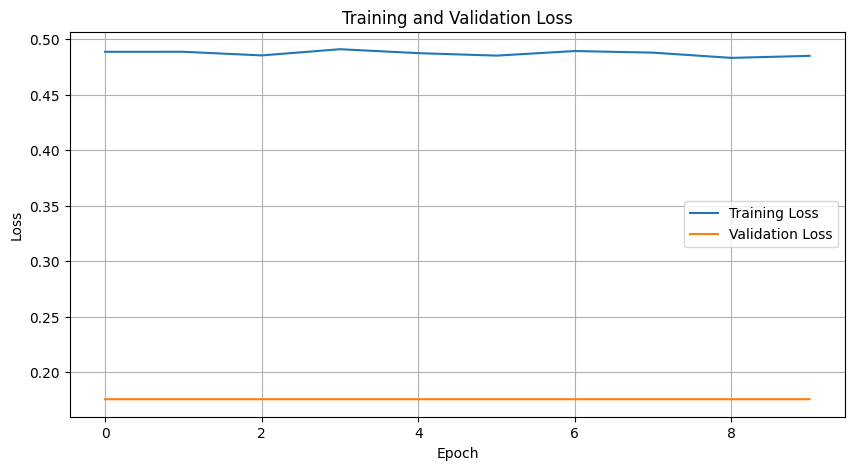

In [16]:
plt.figure(figsize=(10, 5))

plt.plot(adagrad_history.history['loss'], label='Training Loss')
plt.plot(adagrad_history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

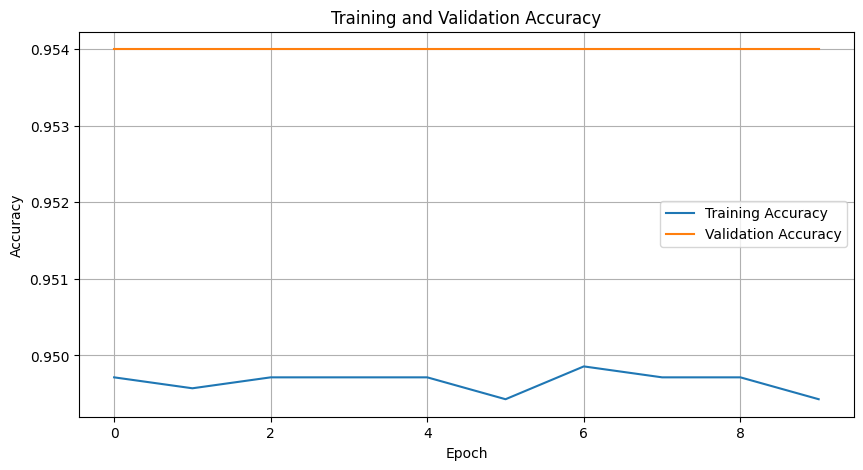

In [17]:
plt.figure(figsize=(10, 5))

plt.plot(adagrad_history.history['accuracy'], label='Training Accuracy')
plt.plot(adagrad_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

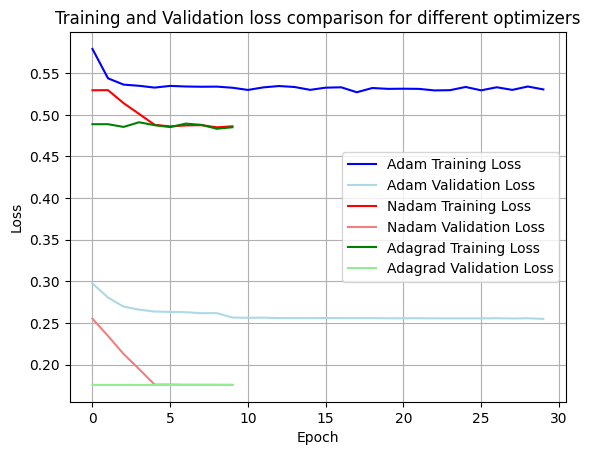

In [18]:
plt.plot(adam_history.history['loss'], label="Adam Training Loss", color="blue")
plt.plot(adam_history.history['val_loss'], label="Adam Validation Loss", color="lightblue")

plt.plot(nadam_history.history['loss'], label="Nadam Training Loss", color="red")
plt.plot(nadam_history.history['val_loss'], label="Nadam Validation Loss", color="lightcoral")

plt.plot(adagrad_history.history['loss'], label="Adagrad Training Loss", color="green")
plt.plot(adagrad_history.history['val_loss'], label="Adagrad Validation Loss", color="lightgreen")

plt.title("Training and Validation loss comparison for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

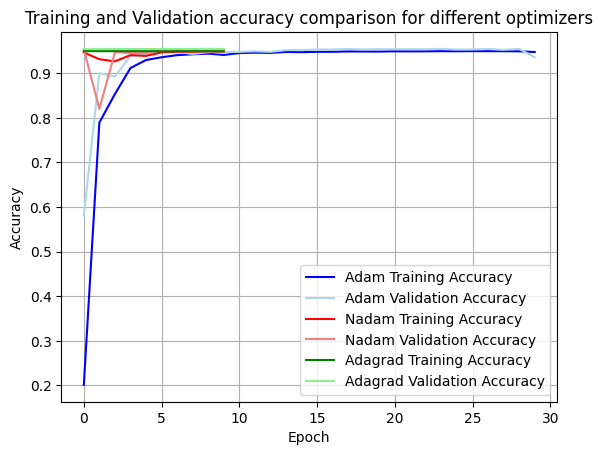

In [19]:
plt.plot(adam_history.history['accuracy'], label="Adam Training Accuracy", color="blue")
plt.plot(adam_history.history['val_accuracy'], label="Adam Validation Accuracy", color="lightblue")

plt.plot(nadam_history.history['accuracy'], label="Nadam Training Accuracy", color="red")
plt.plot(nadam_history.history['val_accuracy'], label="Nadam Validation Accuracy", color="lightcoral")

plt.plot(adagrad_history.history['accuracy'], label="Adagrad Training Accuracy", color="green")
plt.plot(adagrad_history.history['val_accuracy'], label="Adagrad Validation Accuracy", color="lightgreen")

plt.title("Training and Validation accuracy comparison for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()